# **ARAVINDAN N'S DATA MINING PROJECT NOTEBOOK**

In [1]:
#Import the necessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## **Problem 1: Clustering**

**A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.**

Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### **1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [ ]:
# Load the dataset
bank_df = pd.read_csv('bank_marketing_part1_Data-1.csv')
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
# Shape of the dataset
rows, cols = bank_df.shape
print('There are {} rows and {} columns in the dataset'.format(rows, cols))

There are 210 rows and 7 columns in the dataset


In [ ]:
# Informstion about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
# Check for null values
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [ ]:
# Check for any duplicated entries
bank_df.duplicated().any()

False

#### **Uni-Variate Analysis**

In [ ]:
# Statistical summary of the dataset
bank_df_stat = bank_df.describe().T
bank_df_stat

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [ ]:
bank_df_stat['Skew']=bank_df.skew(axis=0)
bank_df_stat['Kurtosis']=bank_df.kurtosis(axis=0)
bank_df_stat

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800,0.399889,-1.084266
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500,0.386573,-1.106703
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183,-0.537954,-0.140315
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750,0.525482,-0.785645
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330,0.134378,-1.097697
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560,0.401667,-0.066603
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500,0.561897,-0.840792


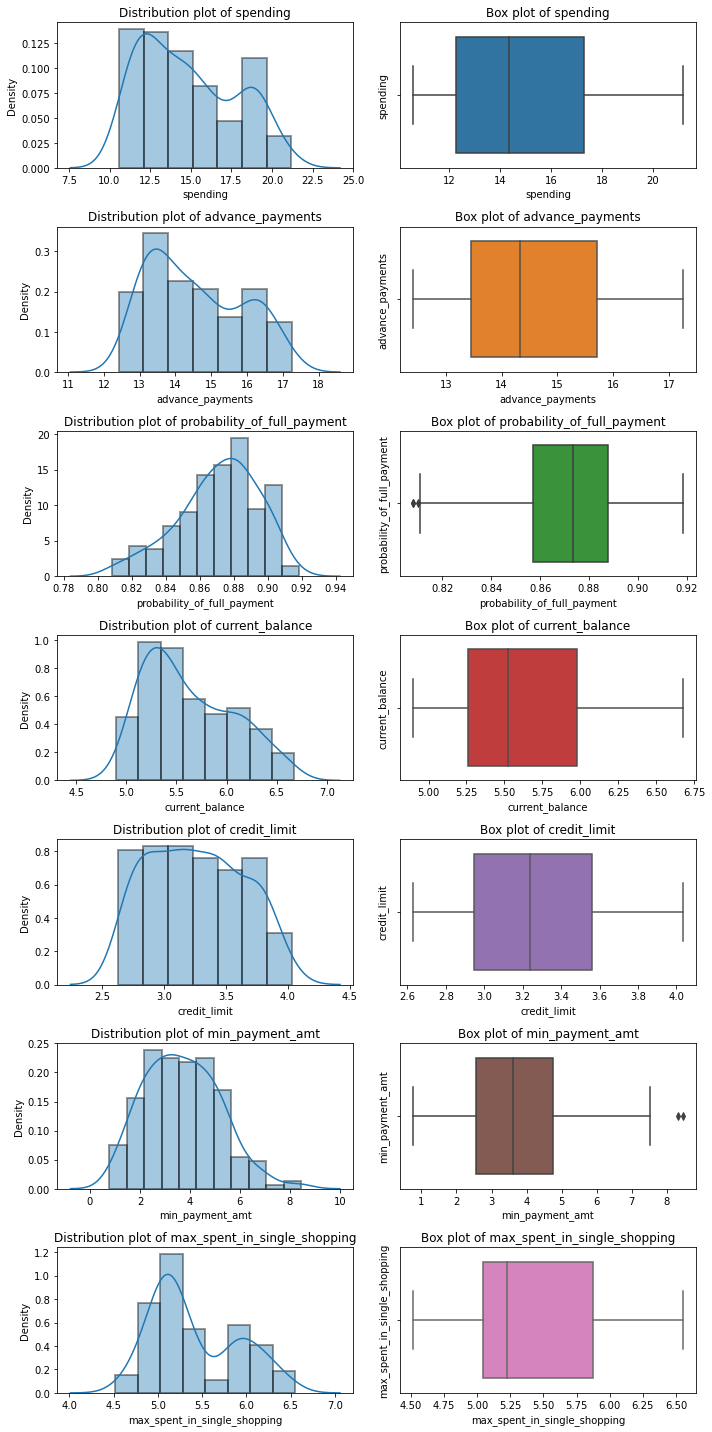

In [ ]:
# Distribution and boxplots of the variables

a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list1 = bank_df.columns.to_list()

palette = itertools.cycle(sns.color_palette())

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(bank_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = bank_df[i], orient='h', palette=palette)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

for i in col_list1:
    Q1 = bank_df[i].quantile(q=0.25)
    Q3 = bank_df[i].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in {}: {}'.format(i, L_outliers))
    print('Upper outliers in {}: {}'.format(i, U_outliers),'\n')
    print('Number of outliers in {} upper: {}'.format(i, bank_df[bank_df[i]>U_outliers][i].count()))
    print('Number of outliers in {} lower: {}'.format(i, bank_df[bank_df[i]<L_outliers][i].count()),'\n')
    print('% of Outlier in {} upper: {}%'.format(i, round(bank_df[bank_df[i]>U_outliers][i].count()*100/len(bank_df),2)))
    print('% of Outlier in {} lower: {}%'.format(i, round(bank_df[bank_df[i]<L_outliers][i].count()*100/len(bank_df),2)),'\n')
    print('###########################################', '\n')

Lower outliers in spending: 4.717499999999999
Upper outliers in spending: 24.8575 

Number of outliers in spending upper: 0
Number of outliers in spending lower: 0 

% of Outlier in spending upper: 0.0%
% of Outlier in spending lower: 0.0% 

########################################### 

Lower outliers in advance_payments: 10.052499999999998
Upper outliers in advance_payments: 19.1125 

Number of outliers in advance_payments upper: 0
Number of outliers in advance_payments lower: 0 

% of Outlier in advance_payments upper: 0.0%
% of Outlier in advance_payments lower: 0.0% 

########################################### 

Lower outliers in probability_of_full_payment: 0.8105875
Upper outliers in probability_of_full_payment: 0.9340875 

Number of outliers in probability_of_full_payment upper: 0
Number of outliers in probability_of_full_payment lower: 3 

% of Outlier in probability_of_full_payment upper: 0.0%
% of Outlier in probability_of_full_payment lower: 1.43% 

########################

#### **Bi-Variate Analysis**

<Figure size 720x720 with 0 Axes>

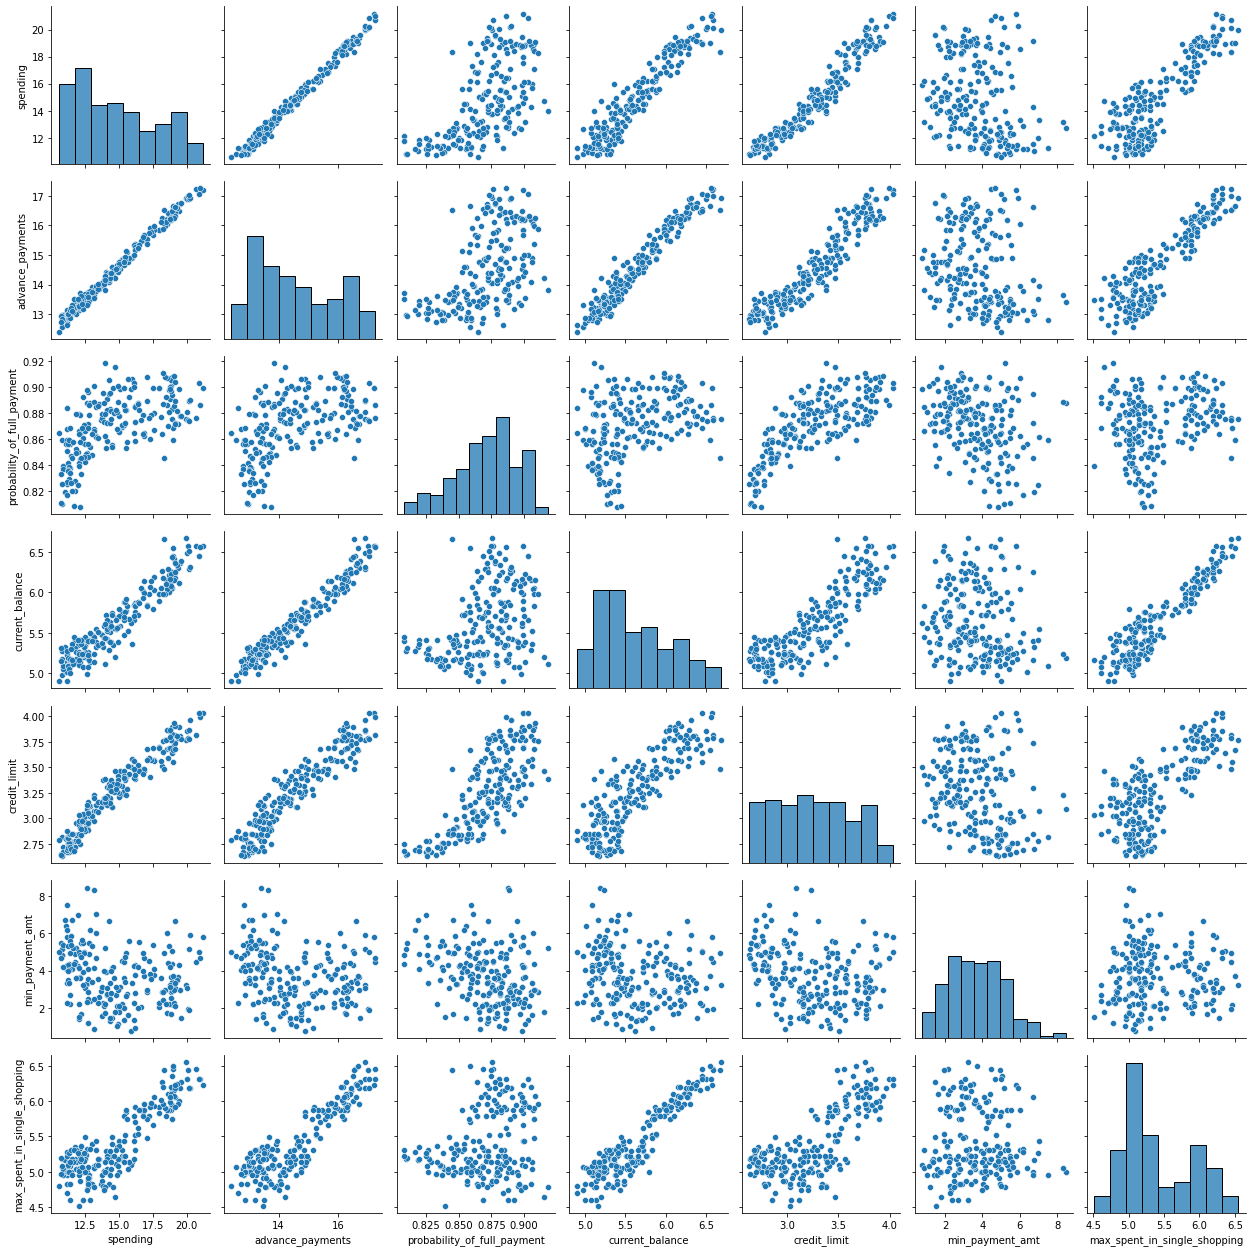

In [ ]:
# Pair plot of the numerical variables
fig2 = plt.figure(figsize=(10,10))
sns.pairplot(data=bank_df, palette='Set1')
plt.tight_layout()
plt.show()

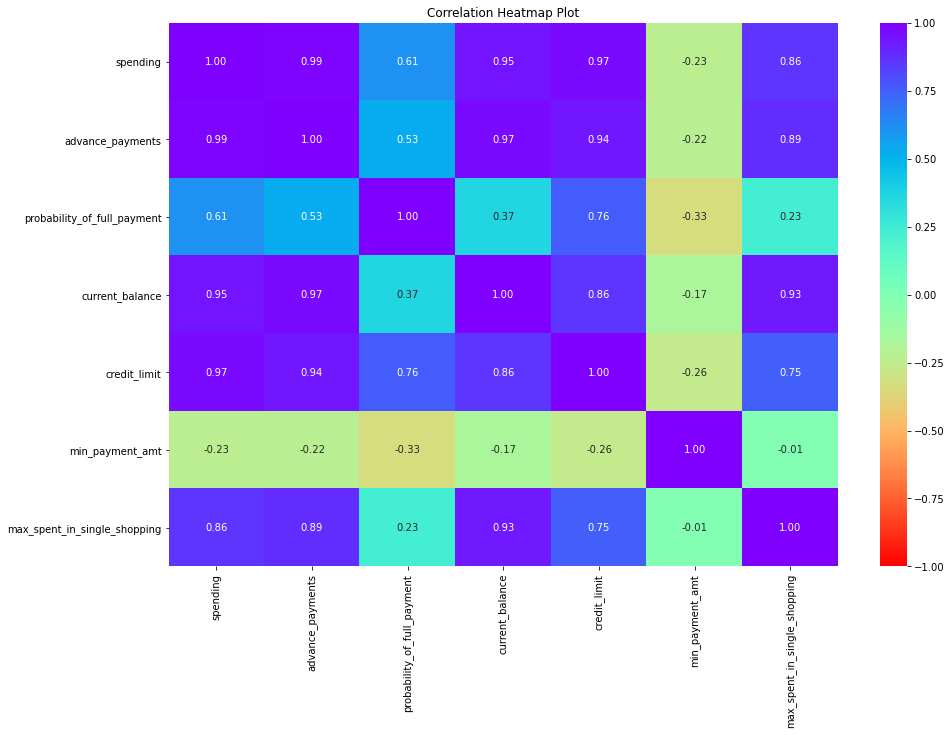

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(bank_df.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

### **1.2  Do you think scaling is necessary for clustering in this case? Justify**

In [ ]:
# Perform standard scaling on the dataset
X = StandardScaler()
bank_df_scaled = X.fit_transform(bank_df)
bank_df_scaled = pd.DataFrame(bank_df_scaled, index=bank_df.index, columns=bank_df.columns)
bank_df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


### **1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

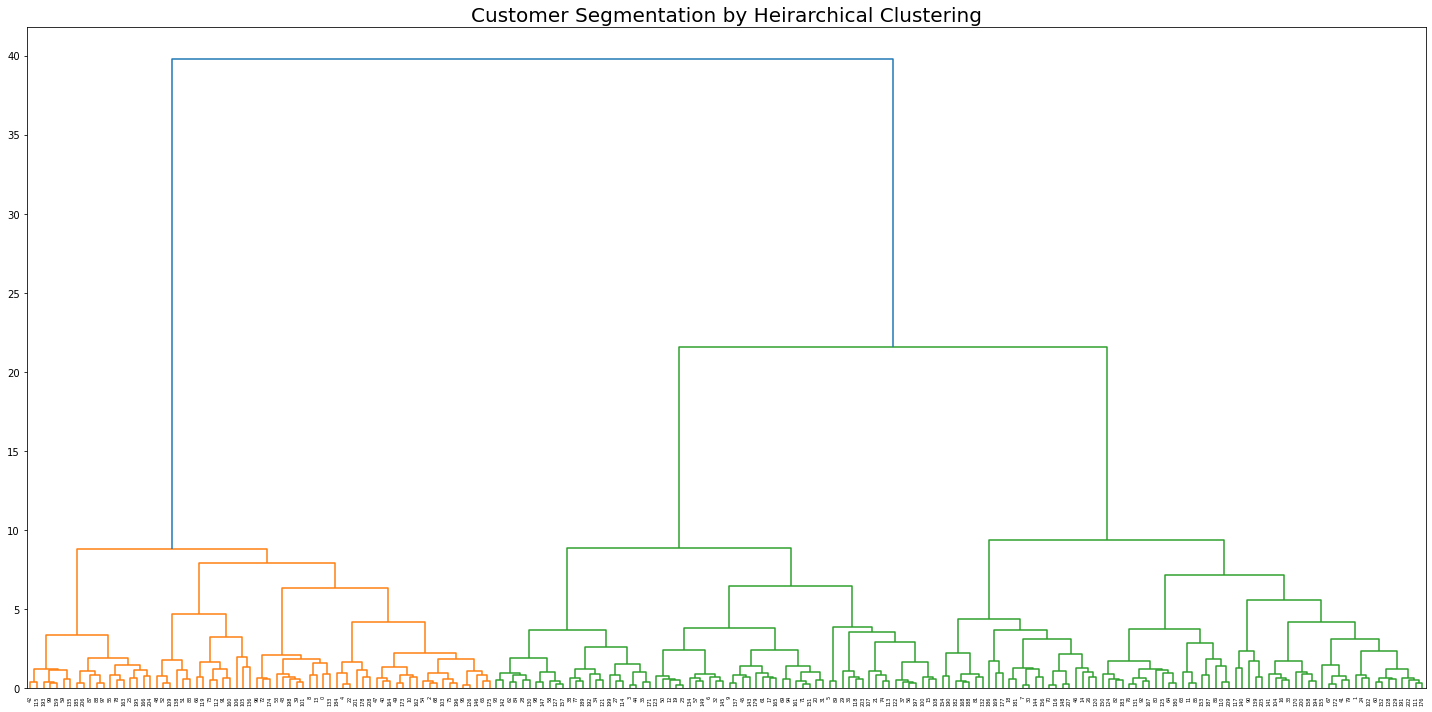

In [ ]:
plt.figure(figsize=(20,10))
HClust = linkage(bank_df_scaled, method = 'ward')
dend = dendrogram(HClust)
plt.title('Customer Segmentation by Heirarchical Clustering', size=20)
plt.tight_layout()
plt.show()

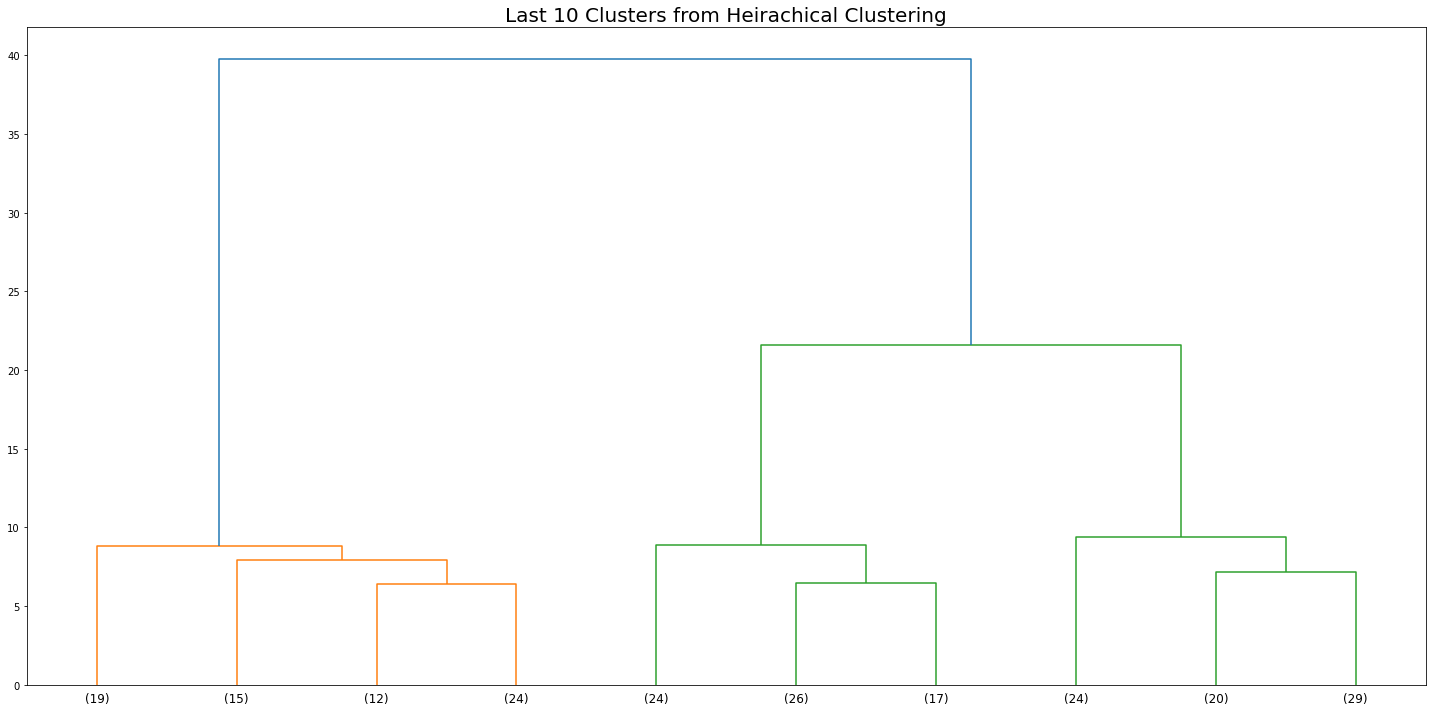

In [ ]:
plt.figure(figsize=(20,10))
dend = dendrogram(HClust, truncate_mode='lastp', p = 10)
plt.title('Last 10 Clusters from Heirachical Clustering', size=20)
plt.tight_layout()
plt.show()

In [ ]:
Ward_clusters = fcluster(HClust, 3, criterion='maxclust')
Ward_clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [ ]:
bank_df['H_Clusters'] = Ward_clusters
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


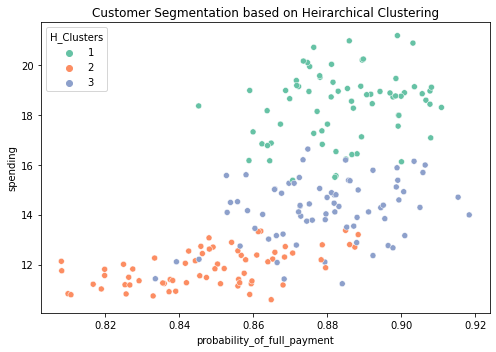

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = bank_df, x= 'probability_of_full_payment', y='spending', hue='H_Clusters', palette='Set2')
plt.title('Customer Segmentation based on Heirarchical Clustering')
plt.tight_layout()
plt.show()

In [ ]:
H_Clusters_Freq = bank_df['H_Clusters'].value_counts().sort_index()
H_Clusters_Freq

1    70
2    67
3    73
Name: H_Clusters, dtype: int64

In [ ]:
H_clust_profile=bank_df.groupby('H_Clusters').mean()
H_clust_profile['H_Clusters_Freq']=bank_df['H_Clusters'].value_counts().sort_index()
H_clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters_Freq
H_Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### **1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.**

In [ ]:
wss =[]
for i in range(1,16):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_df_scaled)
    wss.append(KM.inertia_)
    print('The WSS value for',i, 'clusters is:', wss[i-1])

The WSS value for 1 clusters is: 1469.9999999999995
The WSS value for 2 clusters is: 659.1717544870411
The WSS value for 3 clusters is: 430.65897315130064
The WSS value for 4 clusters is: 371.301721277542
The WSS value for 5 clusters is: 326.5465603349344
The WSS value for 6 clusters is: 289.46717056412893
The WSS value for 7 clusters is: 263.25617158316186
The WSS value for 8 clusters is: 241.32403306392985
The WSS value for 9 clusters is: 222.23556112722449
The WSS value for 10 clusters is: 204.70996635663616
The WSS value for 11 clusters is: 193.15276248531555
The WSS value for 12 clusters is: 182.76506811271486
The WSS value for 13 clusters is: 172.76962969216174
The WSS value for 14 clusters is: 167.37137874109524
The WSS value for 15 clusters is: 158.3586289541889


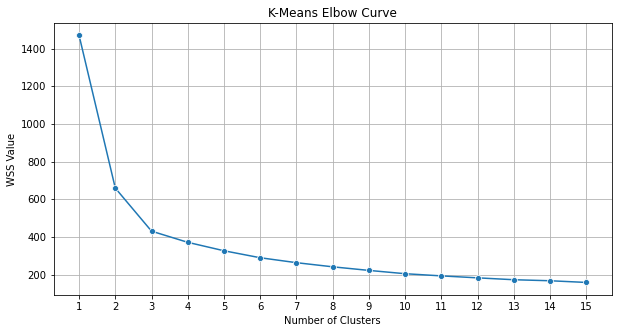

In [ ]:
#Create a scree plot
plt.figure(figsize=(10,5))
sns.lineplot(y=wss ,x=range(1,16),marker='o')
plt.xlabel('Number of Clusters',fontsize=10)
plt.ylabel('WSS Value',fontsize=10)
plt.title('K-Means Elbow Curve',fontsize=12)
plt.xticks(ticks= range(1,16))
plt.grid()
plt.show()

In [ ]:
k_means3 = KMeans(n_clusters = 3, random_state=1)
k_means3.fit(bank_df_scaled)
labels = k_means3.labels_
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [ ]:
silhouette_score(bank_df_scaled, labels)

0.4007270552751298

In [ ]:
silhouette_samples(bank_df_scaled, labels).min()

0.002713089347678376

In [ ]:
bank_drop_df=bank_df.drop(['H_Clusters'], axis=1)
bank_drop_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
bank_drop_df['KMeans_Clusters'] = labels
bank_drop_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMeans_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [ ]:
bank_df['KMeans_Clusters'] = labels
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,KMeans_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


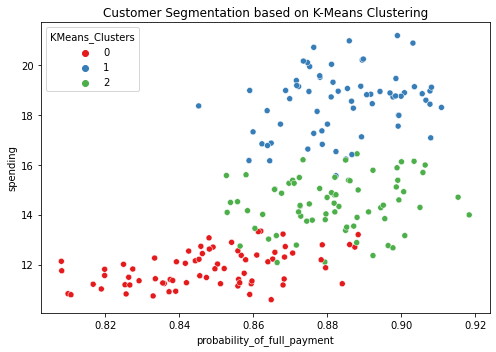

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = bank_df, x= 'probability_of_full_payment', y='spending', hue='KMeans_Clusters', palette='Set1')
plt.title('Customer Segmentation based on K-Means Clustering')
plt.tight_layout()
plt.show()

In [ ]:
KMeans_Clusters_Freq = bank_df['KMeans_Clusters'].value_counts().sort_index()
KMeans_Clusters_Freq

0    72
1    67
2    71
Name: KMeans_Clusters, dtype: int64

In [ ]:
KMeans_clust_profile=bank_drop_df.groupby('KMeans_Clusters').mean()
KMeans_clust_profile['KMeans_Clusters_Freq']=bank_drop_df['KMeans_Clusters'].value_counts().sort_index()
KMeans_clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMeans_Clusters_Freq
KMeans_Clusters,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


### **1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**

Group 1: High Spending Group –
Giving any reward points might increase their purchases. –
Maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment –
Increase their credit limit and –
Increase spending habits –
Give loan against the credit card, as they are customers with good repayment record. –
Tie up with luxury brands, which will drive more one_time_maximun spending
Group 2: Low Spending Group - customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate. - Increase their spending habits by tying up with grocery stores, utilities (electricity, phone, gas, others)
Group 3: Medium Spending Group - They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. - Promote premium cards/loyalty cars to increase transactions. - Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourage them to spend more

## **Problem 2: CART-RF-ANN**

**An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.**

Data Dictionary:-

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

### **2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [ ]:
#Load the Data
insurance_df = pd.read_csv('insurance_part2_data-2.csv')
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
# Shape of the dataset
rows, cols = insurance_df.shape
print('There are {} rows and {} columns in the dataset'.format(rows, cols))

There are 3000 rows and 10 columns in the dataset


In [ ]:
# Informstion about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
# Check for null values
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [ ]:
# Check for any duplicated entries
insurance_df.duplicated().any()

True

In [ ]:
# Check how many entries are duplicate
print('There are {} duplicate rows in the dataset'.format(insurance_df.duplicated().sum()))

There are 139 duplicate rows in the dataset


In [ ]:
insurance_df.drop_duplicates(inplace=True)

In [ ]:
print('Number of duplicate rows = %d after dropping' % (insurance_df.duplicated().sum()))
print(insurance_df.shape)

Number of duplicate rows = 0 after dropping
(2861, 10)


#### **Uni-Variate Analysis**

In [ ]:
# Statistical summary of the dataset
insurance_df_stat = insurance_df.describe().T
insurance_df_stat

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [ ]:
insurance_df_stat['Skew']=insurance_df.skew(axis=0)
insurance_df_stat['Kurtosis']=insurance_df.kurtosis(axis=0)
insurance_df_stat

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00,1.103145,1.442122
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21,3.104741,13.587072
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00,13.786096,422.629934
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00,2.344643,5.965023


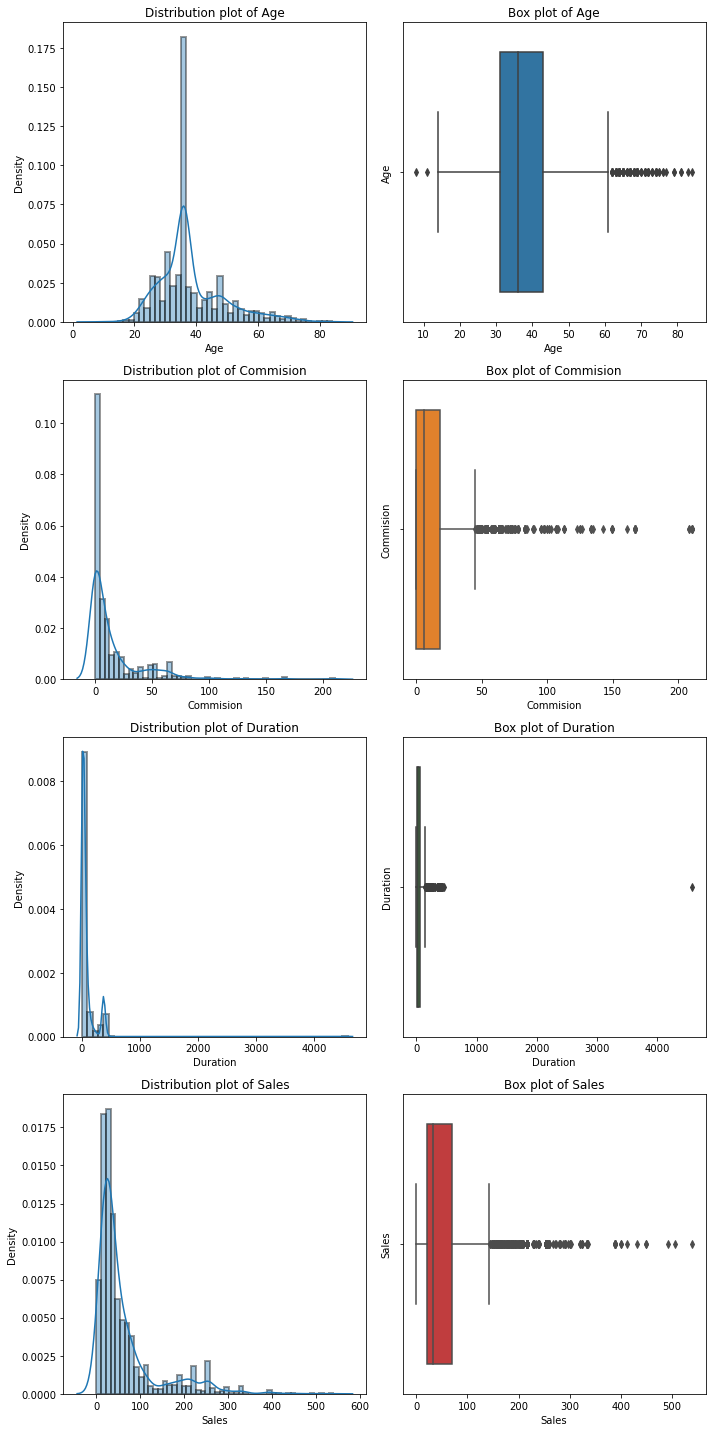

In [ ]:
# Distribution and boxplots of the variables

a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list2 = ['Age','Commision', 'Duration', 'Sales']

palette = itertools.cycle(sns.color_palette())

fig3 = plt.figure(figsize=(10,20))

for i in col_list2:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(insurance_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = insurance_df[i], orient='h', palette=palette)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#Outlier detection from Interquartile range (IQR) in duplicate removed data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

for i in col_list2:
    Q1 = insurance_df[i].quantile(q=0.25)
    Q3 = insurance_df[i].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in {}: {}'.format(i, L_outliers))
    print('Upper outliers in {}: {}'.format(i, U_outliers),'\n')
    print('Number of outliers in {} upper: {}'.format(i, insurance_df[insurance_df[i]>U_outliers][i].count()))
    print('Number of outliers in {} lower: {}'.format(i, insurance_df[insurance_df[i]<L_outliers][i].count()),'\n')
    print('% of Outlier in {} upper: {}%'.format(i, round(insurance_df[insurance_df[i]>U_outliers][i].count()*100/len(insurance_df),2)))
    print('% of Outlier in {} lower: {}%'.format(i, round(insurance_df[insurance_df[i]<L_outliers][i].count()*100/len(insurance_df),2)),'\n')
    print('###########################################', '\n')

Lower outliers in Age: 13.0
Upper outliers in Age: 61.0 

Number of outliers in Age upper: 128
Number of outliers in Age lower: 2 

% of Outlier in Age upper: 4.47%
% of Outlier in Age lower: 0.07% 

########################################### 

Lower outliers in Commision: -26.73
Upper outliers in Commision: 44.55 

Number of outliers in Commision upper: 354
Number of outliers in Commision lower: 0 

% of Outlier in Commision upper: 12.37%
% of Outlier in Commision lower: 0.0% 

########################################### 

Lower outliers in Duration: -69.0
Upper outliers in Duration: 147.0 

Number of outliers in Duration upper: 362
Number of outliers in Duration lower: 0 

% of Outlier in Duration upper: 12.65%
% of Outlier in Duration lower: 0.0% 

########################################### 

Lower outliers in Sales: -53.94999999999999
Upper outliers in Sales: 143.25 

Number of outliers in Sales upper: 346
Number of outliers in Sales lower: 0 

% of Outlier in Sales upper: 12.09%

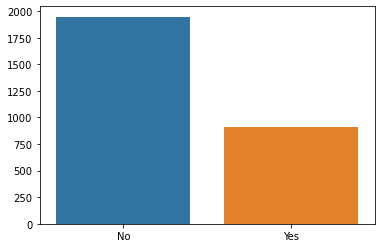

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64


In [ ]:
# Proportion of the 0s and 1s in the target variable claimed
sns.barplot(x=insurance_df.Claimed.value_counts().index,y=insurance_df.Claimed.value_counts().values)
plt.show()
print(insurance_df.Claimed.value_counts(normalize=True))

In [ ]:
insurance_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

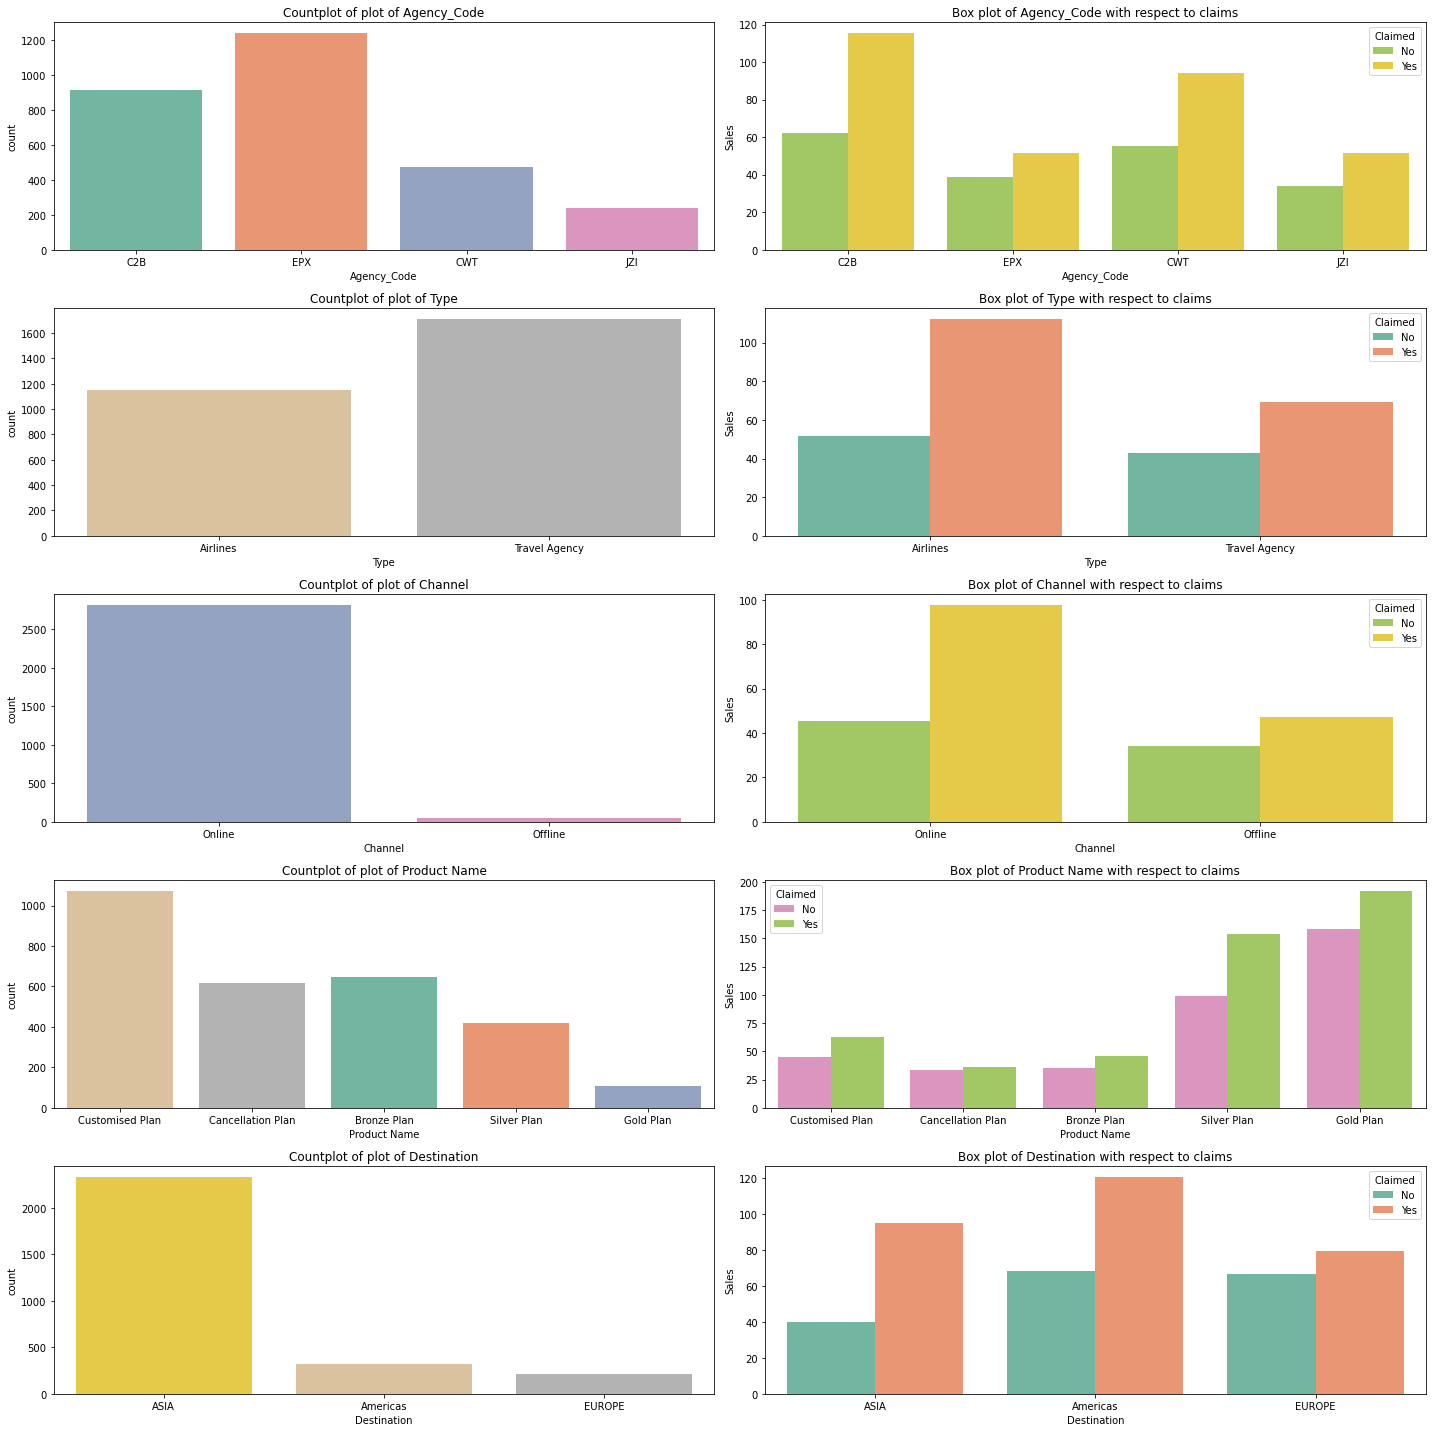

In [ ]:
# Distribution and boxplots of the variables

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list3 = ['Agency_Code', 'Type', 'Channel', 'Product Name', 'Destination']

palette = itertools.cycle(sns.color_palette(palette='Set2'))

fig3 = plt.figure(figsize=(20,20))

for i in col_list3:
    plt.subplot(a, b, c)
    plt.title('Countplot of plot of {}'.format(i))
    plt.xlabel(i)
    sns.countplot(data = insurance_df, x = insurance_df[i], palette=palette);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {} with respect to claims'.format(i))
    plt.xlabel(i)
    plt.ylabel('Sales')
    sns.barplot(data = insurance_df, x=insurance_df[i],y='Sales', hue='Claimed', ci=None, palette=palette);
    c = c + 1

plt.tight_layout()
plt.show()

#### **Bi-Variate Analysis**

<Figure size 720x720 with 0 Axes>

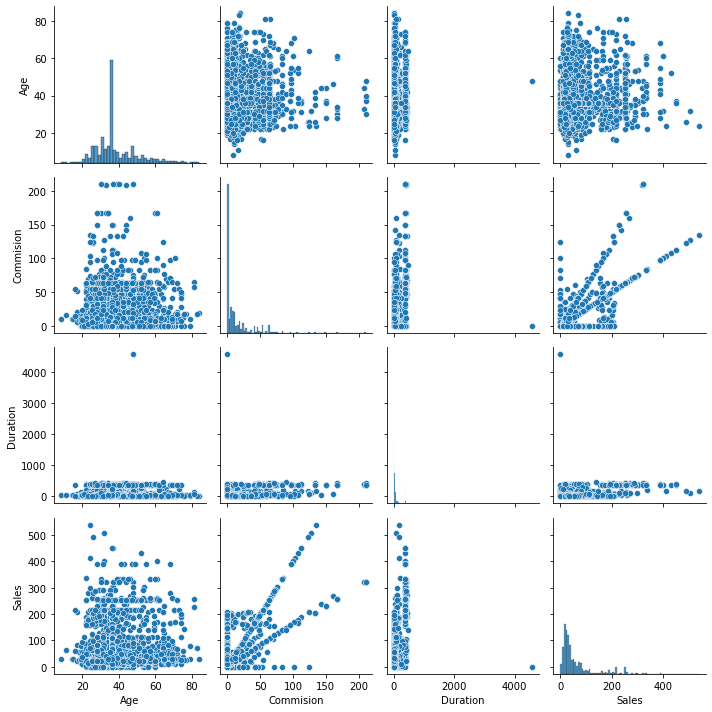

In [ ]:
# Pair plot of the numerical variables
fig4 = plt.figure(figsize=(10,10))
sns.pairplot(data=insurance_df[col_list2], palette='Set1')
plt.tight_layout()
plt.show()

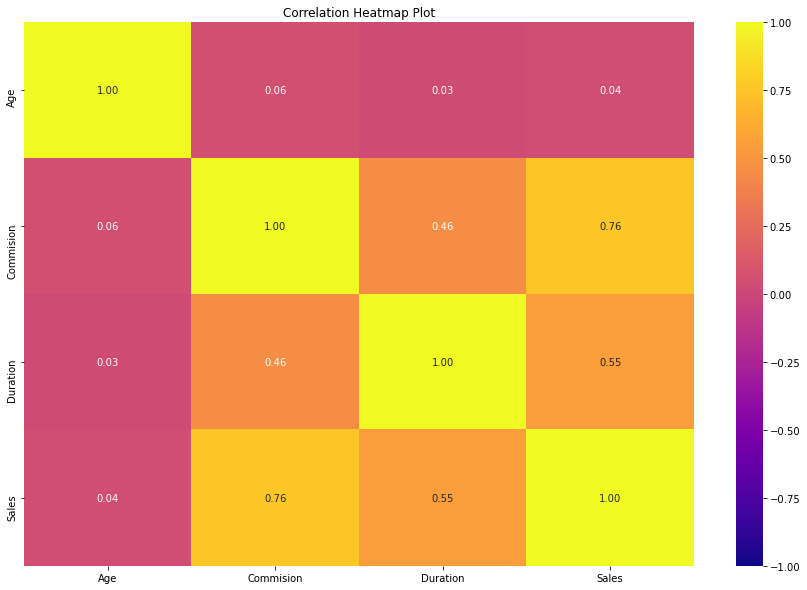

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(insurance_df.corr(),2),fmt='.2f',annot=True,cmap='plasma', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

#### **One-Hot encoding of the object datatypes**

In [ ]:
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(insurance_df[feature].unique()))
        print(pd.Categorical(insurance_df[feature].unique()).codes)
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes



Feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


Feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


Feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


Feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


Feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [ ]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### **2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**

In [ ]:
X = insurance_df.drop("Claimed", axis=1)
y = insurance_df.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [ ]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### **Decision Tree Classifier**

In [ ]:
# Instantiate the CART model

dtc = DecisionTreeClassifier(random_state=1)

In [ ]:
# Perform grid search of best parameters for CART

param_grid_dtc = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150,200], 
    'min_samples_split': [150,300,450,500],
}

dtc = DecisionTreeClassifier(random_state=1)

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid_dtc, cv = 5)

In [ ]:
# Fit the training data on the grid search
grid_search_dtc.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_samples_split': [150, 300, 450, 500]})

In [ ]:
# Get the best parameters
grid_search_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 300}

In [ ]:
# Create the best grid estimator

best_grid_dtc = grid_search_dtc.best_estimator_

In [ ]:
# Predict on both test & train

ytrain_predict_dtc = best_grid_dtc.predict(X_train)
ytest_predict_dtc = best_grid_dtc.predict(X_test)

In [ ]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtc, out_file= tree_regularized ,
                                feature_names = list(insurance_df.columns),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

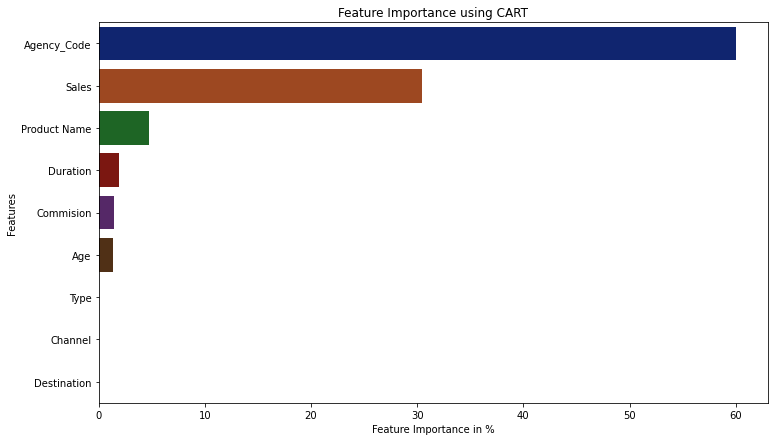

In [ ]:
x=pd.DataFrame(best_grid_dtc.feature_importances_*100,index=insurance_df.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART')
plt.show()

#### Random Forest Classifier

In [ ]:
# Instantiate the RFC Model

rfc = RandomForestClassifier(random_state=1)

In [ ]:
# Perform Grid Search

param_grid_rfc = {
    'max_depth': [5, 10, 15],
    'max_features': [3, 4, 5, 6],
    'min_samples_leaf': [25, 50, 100],
    'min_samples_split': [150, 300, 450],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier(random_state=1)

grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, cv = 5)

In [ ]:
# Fit the training data on the grid search

grid_search_rfc.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [25, 50, 100],
                         'min_samples_split': [150, 300, 450],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Get the best parameters
grid_search_rfc.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 25,
 'min_samples_split': 150,
 'n_estimators': 100}

In [ ]:
# Create the best grid estimator

best_grid_rfc = grid_search_rfc.best_estimator_

In [ ]:
# Predict on both test & train

ytrain_predict_rfc = best_grid_rfc.predict(X_train)
ytest_predict_rfc = best_grid_rfc.predict(X_test)

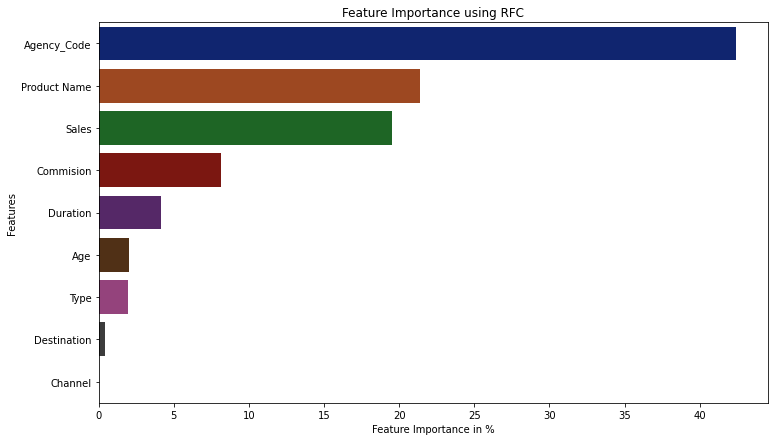

In [ ]:
x=pd.DataFrame(best_grid_rfc.feature_importances_*100,index=insurance_df.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RFC')
plt.show()

#### ANN Classifier

In [ ]:
# Instantiate the MLP Model

mlp = MLPClassifier(random_state=1)

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam', 'sgd'], #sgd
    'tol': [0.01], 
}

mlp = MLPClassifier(random_state=1)

grid_search_mlp = GridSearchCV(estimator = mlp, param_grid = param_grid_mlp, cv = 5)

In [ ]:
# Fit the training data on the grid search

grid_search_mlp.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000],
                         'solver': ['adam', 'sgd'], 'tol': [0.01]})

In [ ]:
# Get the best parameters
grid_search_mlp.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [ ]:
# Create the best grid estimator

best_grid_mlp = grid_search_mlp.best_estimator_

In [ ]:
# Predict on both test & train

ytrain_predict_mlp = best_grid_mlp.predict(X_train)
ytest_predict_mlp = best_grid_mlp.predict(X_test)

### **2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.**

In [ ]:
models_names={dtc:'Decision Tree Classifier',rfc:'Random Forest Classifier',mlp:'ANN'}

#### CART Metrics for Predictions on the Training set

Accuracy for the Decision Tree Classifier model on the training set is 
 0.7642357642357642


Classification report for the Decision Tree Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



Confusion Matrix for the Decision Tree Classifier model on the training set is


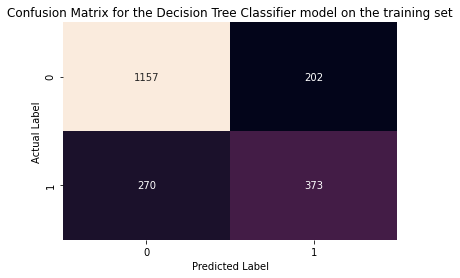

In [ ]:
print('Accuracy for the {} model on the training set is'.format(models_names[dtc]),'\n',accuracy_score(train_labels,ytrain_predict_dtc))
print('\n')
print('Classification report for the {} model on the training set is'.format(models_names[dtc]),'\n',classification_report(train_labels,ytrain_predict_dtc))
print('\n')
print('Confusion Matrix for the {} model on the training set is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the training set'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Decision Tree Classification Model is 0.8104749512780988 



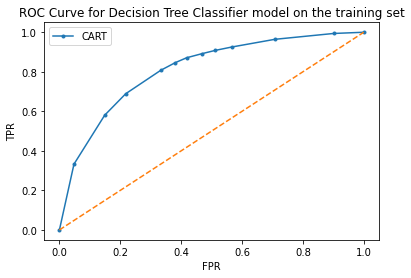

In [ ]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(train_labels,best_grid_dtc.predict_proba(X_train)[:,1]),'\n')

#plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(train_labels,best_grid_dtc.predict_proba(X_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier model on the training set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['CART'])
plt.show()

#### RF Metrics for Predictions on the Training set

Accuracy for the Random Forest Classifier model on the training set is 
 0.7762237762237763


Classification report for the Random Forest Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1359
           1       0.69      0.55      0.61       643

    accuracy                           0.78      2002
   macro avg       0.75      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



Confusion Matrix for the Random Forest Classifier model on the training set is


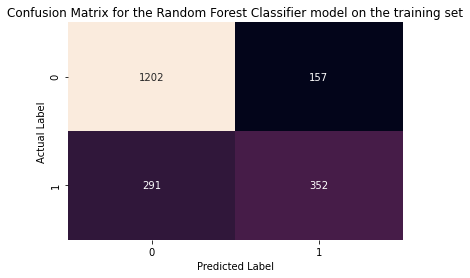

In [ ]:
print('Accuracy for the {} model on the training set is'.format(models_names[rfc]),'\n',accuracy_score(train_labels,ytrain_predict_rfc))
print('\n')
print('Classification report for the {} model on the training set is'.format(models_names[rfc]),'\n',classification_report(train_labels,ytrain_predict_rfc))
print('\n')
print('Confusion Matrix for the {} model on the training set is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the training set'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Random Forest Classification Model is 0.8236204234885911 



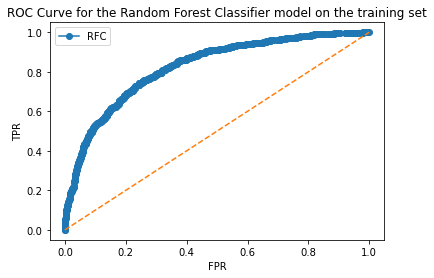

In [ ]:
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(train_labels, best_grid_rfc.predict_proba(X_train)[:,1]),'\n')

fpr_rfc, tpr_rfc, thresholds = roc_curve(train_labels,best_grid_rfc.predict_proba(X_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the {} model on the training set'.format('Random Forest Classifier'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['RFC'])
plt.show()

#### ANN Metrics for Predictions on the Training set

Accuracy for the ANN model on the training set is 
 0.7577422577422578


Classification report for the ANN model on the training set is 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



Confusion Matrix for the ANN model on the training set is


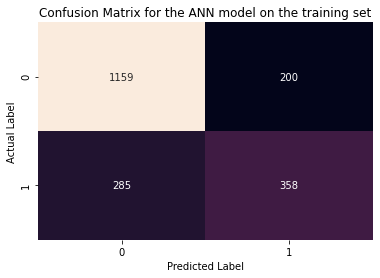

In [ ]:
print('Accuracy for the {} model on the training set is'.format(models_names[mlp]),'\n',accuracy_score(train_labels,ytrain_predict_mlp))
print('\n')
print('Classification report for the {} model on the training set is'.format(models_names[mlp]),'\n',classification_report(train_labels,ytrain_predict_mlp))
print('\n')
print('Confusion Matrix for the {} model on the training set is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the training set'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Artificial Neural Network Model is 0.7921265636497425 



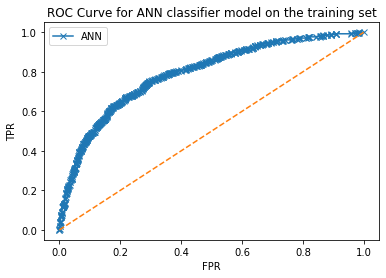

In [ ]:
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(train_labels,best_grid_mlp.predict_proba(X_train)[:,1]),'\n')

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels,best_grid_mlp.predict_proba(X_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('ANN classifier model on the training set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['ANN'])
plt.show()

#### AUC-ROC Curves for all the models on the training set 

Area under the curve for Decision Tree Classification Model is 0.8104749512780988
Area under the curve for Random Forest Classification Model is 0.8236204234885911
Area under the curve for Artificial Neural Network Model is 0.7921265636497425 



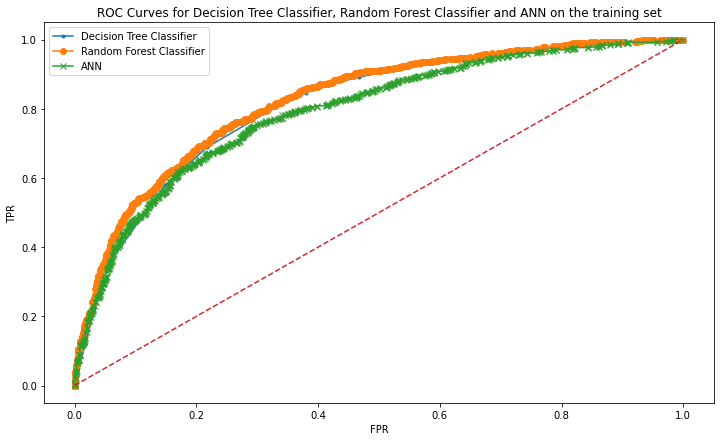

In [ ]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(train_labels,best_grid_dtc.predict_proba(X_train)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(train_labels, best_grid_rfc.predict_proba(X_train)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(train_labels,best_grid_mlp.predict_proba(X_train)[:,1]),'\n')

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(train_labels,best_grid_dtc.predict_proba(X_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(train_labels,best_grid_rfc.predict_proba(X_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels,best_grid_mlp.predict_proba(X_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curves for {}'.format('Decision Tree Classifier, Random Forest Classifier and ANN on the training set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

#### CART Metrics for Predictions on the Testing set

Accuracy for the Decision Tree Classifier model on the testing set is 
 0.7823050058207218


Classification report for the Decision Tree Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



Confusion Matrix for the Decision Tree Classifier model on the testing set is


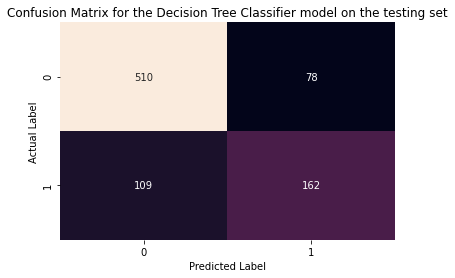

In [ ]:
print('Accuracy for the {} model on the testing set is'.format(models_names[dtc]),'\n',accuracy_score(test_labels,ytest_predict_dtc))
print('\n')
print('Classification report for the {} model on the testing set is'.format(models_names[dtc]),'\n',classification_report(test_labels,ytest_predict_dtc))
print('\n')
print('Confusion Matrix for the {} model on the testing set is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the testing set'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Decision Tree Classification Model is 0.7922785350302481


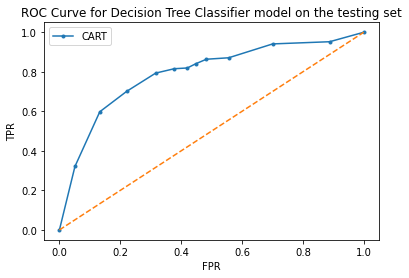

In [ ]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,best_grid_dtc.predict_proba(X_test)[:,1]))


fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels,best_grid_dtc.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier model on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['CART'])
plt.show()

#### RF Metrics for Predictions on the Testing set

Accuracy for the Random Forest Classifier model on the testing set is 
 0.779976717112922


Classification report for the Random Forest Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.69      0.55      0.61       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



Confusion Matrix for the Random Forest Classifier model on the testing set is


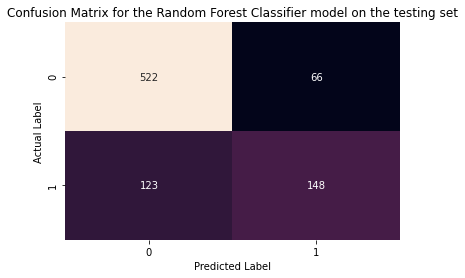

In [ ]:
print('Accuracy for the {} model on the testing set is'.format(models_names[rfc]),'\n',accuracy_score(test_labels,ytest_predict_rfc))
print('\n')
print('Classification report for the {} model on the testing set is'.format(models_names[rfc]),'\n',classification_report(test_labels,ytest_predict_rfc))
print('\n')
print('Confusion Matrix for the {} model on the testing set is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the testing set'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Random Forest Classification Model is 0.819119160579361 



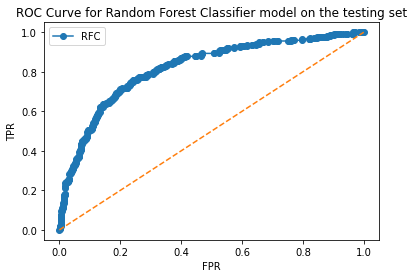

In [ ]:
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels, best_grid_rfc.predict_proba(X_test)[:,1]),'\n')

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, best_grid_rfc.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Random Forest Classifier model on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['RFC'])
plt.show()

#### ANN Metrics for Predictions on the Testing set

Accuracy for the ANN model on the testing set is 
 0.7683352735739232


Classification report for the ANN model on the testing set is 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



Confusion Matrix for the ANN model on the testing set is


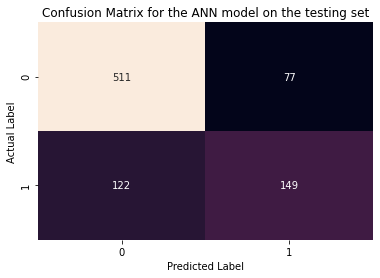

In [ ]:
print('Accuracy for the {} model on the testing set is'.format(models_names[mlp]),'\n',accuracy_score(test_labels,ytest_predict_mlp))
print('\n')
print('Classification report for the {} model on the testing set is'.format(models_names[mlp]),'\n',classification_report(test_labels,ytest_predict_mlp))
print('\n')
print('Confusion Matrix for the {} model on the testing set is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the testing set'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Artificial Neural Network Model is 0.7977947636619223 



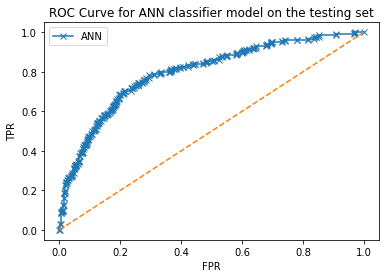

In [ ]:
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,best_grid_mlp.predict_proba(X_test)[:,1]),'\n')

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels,best_grid_mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('ANN classifier model on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['ANN'])
plt.show()

### **2.4 Final Model: Compare all the models and write an inference which model is best/optimized.**

#### AUC-ROC Curves for all the models on the Testing set

Area under the curve for Decision Tree Classification Model is 0.7922785350302481
Area under the curve for Random Forest Classification Model is 0.819119160579361
Area under the curve for Artificial Neural Network Model is 0.7977947636619223 



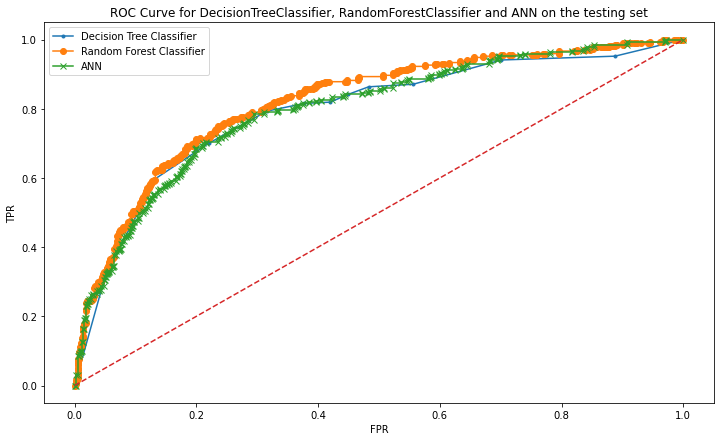

In [ ]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,best_grid_dtc.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels, best_grid_rfc.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,best_grid_mlp.predict_proba(X_test)[:,1]),'\n')

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels,best_grid_dtc.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, best_grid_rfc.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels,best_grid_mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [ ]:
print('Accuracy Score for the Decision Tree Classifier Model on the training set is:',accuracy_score(train_labels, ytrain_predict_dtc))
print('Precision Score for the Decision Tree Classifier Model on the training set is:',precision_score(train_labels, ytrain_predict_dtc))
print('Recall Score for the Decision Tree Classifier Model on the training set is:',recall_score(train_labels, ytrain_predict_dtc))
print('F1-Score for the Decision Tree Classifier Model on the training set is:',f1_score(train_labels, ytrain_predict_dtc))

Accuracy Score for the Decision Tree Classifier Model on the training set is: 0.7642357642357642
Precision Score for the Decision Tree Classifier Model on the training set is: 0.648695652173913
Recall Score for the Decision Tree Classifier Model on the training set is: 0.5800933125972006
F1-Score for the Decision Tree Classifier Model on the training set is: 0.6124794745484401


In [ ]:
print('Accuracy Score for the Decision Tree Classifier Model on the testing set is:',accuracy_score(test_labels, ytest_predict_dtc))
print('Precision Score for the Decision Tree Classifier Model on the testing set is:',precision_score(test_labels, ytest_predict_dtc))
print('Recall Score for the Decision Tree Classifier Model on the testing set is:',recall_score(test_labels, ytest_predict_dtc))
print('F1-Score for the Decision Tree Classifier Model on the testing set is:',f1_score(test_labels, ytest_predict_dtc))

Accuracy Score for the Decision Tree Classifier Model on the testing set is: 0.7823050058207218
Precision Score for the Decision Tree Classifier Model on the testing set is: 0.675
Recall Score for the Decision Tree Classifier Model on the testing set is: 0.5977859778597786
F1-Score for the Decision Tree Classifier Model on the testing set is: 0.6340508806262231


In [ ]:
print('Accuracy Score for the Random Forest Classifier Model on the training set is:',accuracy_score(train_labels, ytrain_predict_rfc))
print('Precision Score for the Random Forest Classifier Model on the training set is:',precision_score(train_labels, ytrain_predict_rfc))
print('Recall Score for the Random Forest Classifier Model on the training set is:',recall_score(train_labels, ytrain_predict_rfc))
print('F1-Score for the Random Forest Classifier Model on the training set is:',f1_score(train_labels, ytrain_predict_rfc))

Accuracy Score for the Random Forest Classifier Model on the training set is: 0.7762237762237763
Precision Score for the Random Forest Classifier Model on the training set is: 0.6915520628683693
Recall Score for the Random Forest Classifier Model on the training set is: 0.5474339035769828
F1-Score for the Random Forest Classifier Model on the training set is: 0.611111111111111


In [ ]:
print('Accuracy Score for the Random Forest Classifier Model on the testing set is:',accuracy_score(test_labels, ytest_predict_rfc))
print('Precision Score for the Random Forest Classifier Model on the testing set is:',precision_score(test_labels, ytest_predict_rfc))
print('Recall Score for the Random Forest Classifier Model on the testing set is:',recall_score(test_labels, ytest_predict_rfc))
print('F1-Score for the Random Forest Classifier Model on the testing set is:',f1_score(test_labels, ytest_predict_rfc))

Accuracy Score for the Random Forest Classifier Model on the testing set is: 0.779976717112922
Precision Score for the Random Forest Classifier Model on the testing set is: 0.6915887850467289
Recall Score for the Random Forest Classifier Model on the testing set is: 0.5461254612546126
F1-Score for the Random Forest Classifier Model on the testing set is: 0.6103092783505155


In [ ]:
print('Accuracy Score for the ANN Classifier Model on the training set is:',accuracy_score(train_labels, ytrain_predict_mlp))
print('Precision Score for the ANN Classifier Model on the training set is:',precision_score(train_labels, ytrain_predict_mlp))
print('Recall Score for the ANN Classifier Model on the training set is:',recall_score(train_labels, ytrain_predict_mlp))
print('F1-Score for the ANN Classifier Model on the training set is:',f1_score(train_labels, ytrain_predict_mlp))

Accuracy Score for the ANN Classifier Model on the training set is: 0.7577422577422578
Precision Score for the ANN Classifier Model on the training set is: 0.6415770609318996
Recall Score for the ANN Classifier Model on the training set is: 0.5567651632970451
F1-Score for the ANN Classifier Model on the training set is: 0.5961698584512906


In [ ]:
print('Accuracy Score for the ANN Classifier Model on the testing set is:',accuracy_score(test_labels, ytest_predict_mlp))
print('Precision Score for the ANN Classifier Model on the testing set is:',precision_score(test_labels, ytest_predict_mlp))
print('Recall Score for the ANN Classifier Model on the testing set is:',recall_score(test_labels, ytest_predict_mlp))
print('F1-Score for the ANN Classifier Model on the testing set is:',f1_score(test_labels, ytest_predict_mlp))

Accuracy Score for the ANN Classifier Model on the testing set is: 0.7683352735739232
Precision Score for the ANN Classifier Model on the testing set is: 0.6592920353982301
Recall Score for the ANN Classifier Model on the testing set is: 0.5498154981549815
F1-Score for the ANN Classifier Model on the testing set is: 0.5995975855130785


![image.png](attachment:da28df90-2aa5-4321-bf40-db8f1fe64c5c.png)

### **2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations**